# EDA

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')
%matplotlib inline


In [2]:
df = pd.read_csv('2015-2018_Happiness_Data')

In [3]:
df

,Unnamed: 0,Happiness_Score,GDP_per_Capita,Life_Expectancy,Freedom,Government_Corruption,Generosity
0,0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,1,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,2,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,3,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,4,7.427,1.32629,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
621,151,3.355,0.44200,0.34300,0.24400,0.06400,0.08300
622,152,3.303,0.45500,0.38100,0.48100,0.09700,0.27000
623,153,3.254,0.33700,0.17700,0.11200,0.10600,0.22400
624,154,3.083,0.02400,0.01000,0.30500,0.03800,0.21800


In [4]:
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 6 columns):
Happiness_Score          626 non-null float64
GDP_per_Capita           626 non-null float64
Life_Expectancy          626 non-null float64
Freedom                  626 non-null float64
Government_Corruption    626 non-null float64
Generosity               626 non-null float64
dtypes: float64(6)
memory usage: 29.5 KB


In [6]:
df.columns

Index(['Happiness_Score', 'GDP_per_Capita', 'Life_Expectancy', 'Freedom',
       'Government_Corruption', 'Generosity'],
      dtype='object')

We will look at the distribution of each variable to check for normality.

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


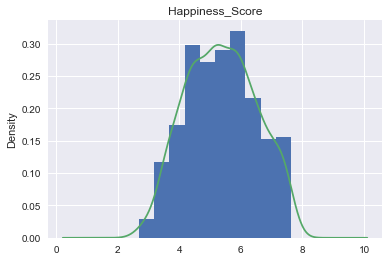

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


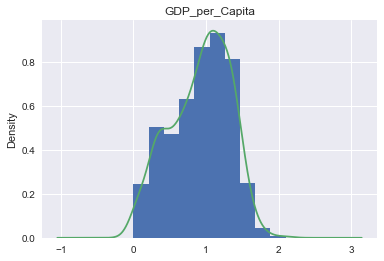

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


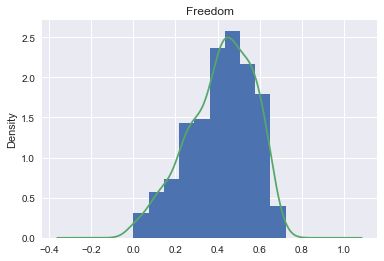

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


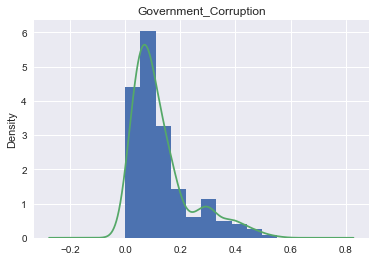

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


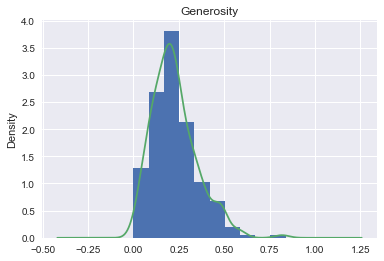

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


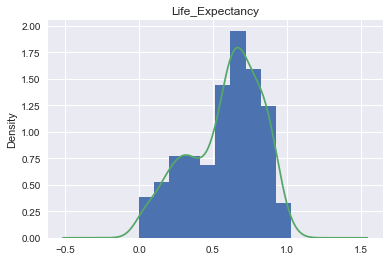

In [7]:
for column in df[['Happiness_Score', 'GDP_per_Capita', 'Freedom', 'Government_Corruption',
       'Generosity', 'Life_Expectancy']]:
    df[column].plot.hist(normed=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.title(label=column)
    plt.show()


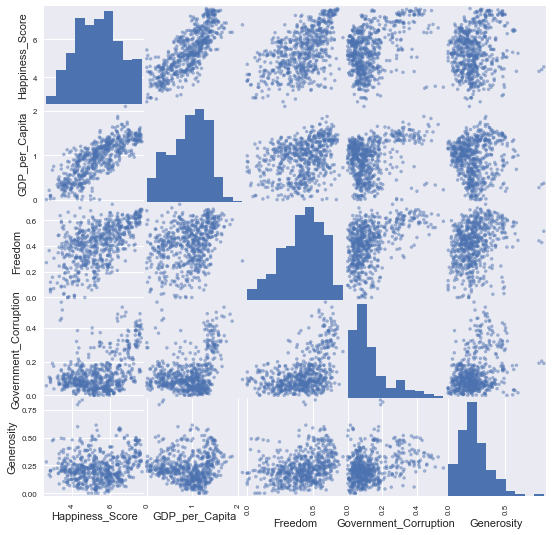

In [8]:
pd.plotting.scatter_matrix(df[['Happiness_Score', 'GDP_per_Capita', 'Freedom', 'Government_Corruption',
       'Generosity']], figsize=[9, 9]);


[Text(0, 0.5, 'Happiness Score'), Text(0.5, 0, 'Variable')]

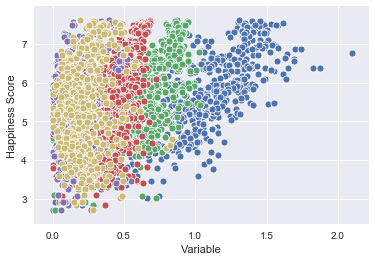

In [9]:
for col in df.drop(['Happiness_Score'], axis=1).columns:
    ax = sns.scatterplot(df[col], df['Happiness_Score'])
ax.set(xlabel='Variable', ylabel='Happiness Score')


In [10]:
corr = df.corr()
corr

,Happiness_Score,GDP_per_Capita,Life_Expectancy,Freedom,Government_Corruption,Generosity
Happiness_Score,1.000000,0.788303,0.754389,0.550175,0.402838,0.153054
GDP_per_Capita,0.788303,1.000000,0.802116,0.329189,0.302797,-0.005749
Life_Expectancy,0.754389,0.802116,1.000000,0.357267,0.268741,0.056900
Freedom,0.550175,0.329189,0.357267,1.000000,0.461249,0.289032
Government_Corruption,0.402838,0.302797,0.268741,0.461249,1.000000,0.311111
Generosity,0.153054,-0.005749,0.056900,0.289032,0.311111,1.000000


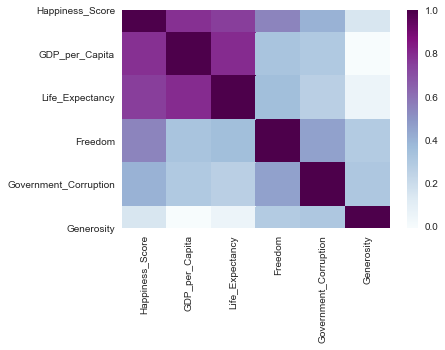

In [11]:
sns.heatmap(corr, cmap='BuPu')
sns.set(font_scale=1.3)


GDP per Capita and Life Expectancy are correlated > 0.8, evidencing multicollinearity, therefore we will need to drop one of these features. 

In [12]:
del df['Life_Expectancy']

The Corruption rating is non-normal, so we will take the log() of the feature. Because there are some ratings of 0, the log(0) creates values of infinity in our dataset in the Trust (Government Corruption) column. We replace these with 0, considering that the original score is 0.

In [13]:
df['Government_Corruption'] = df['Government_Corruption'].map(lambda x: np.log(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [14]:
df['Generosity'] = df['Generosity'].map(lambda x: np.log(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [15]:
df.replace([np.inf, -np.inf], 0, inplace=True)

# Multiple Linear Regression

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

In [21]:
y = df[['Happiness_Score']]
X = df.drop(['Happiness_Score'], axis=1)

We'll split the data into training and testing data.

In [22]:
y2 = df[['Happiness_Score']]
X2 = df.drop(['Happiness_Score', 'Government_Corruption'], axis=1)

In [23]:
# Regression model validation:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [24]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)


Train Mean Squarred Error: 0.34904667146644014
Test Mean Squarred Error: 0.37522880590928853


# Stepwise Selection

We'll run a stepwise selection using our training data.

In [25]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [26]:
result = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(result)

Add  GDP_per_Capita                 with p-value 2.99689e-96
Add  Freedom                        with p-value 1.74038e-30
Add  Generosity                     with p-value 0.00341198
resulting features:
['GDP_per_Capita', 'Freedom', 'Generosity']


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


A step-wise selection method resulted in Corruption being excluded from our model. We then ran our model including these features.

In [37]:
# Regression model validation:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.2, random_state=42)


In [38]:
len(train)

500

In [39]:
len(test)

126

In [40]:
formula = "Happiness_Score ~ GDP_per_Capita+Freedom+Generosity"
model_fit = ols(formula= formula, data=train).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     466.3
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          6.73e-144
Time:                        17:27:29   Log-Likelihood:                -442.07
No. Observations:                 500   AIC:                             892.1
Df Residuals:                     496   BIC:                             909.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.9058      0.118     24.693      0.000       2.675       3.137
GDP_per_Capita     1.8795      0.067     27.984      0.000       1.748       2.011
Freedom            2.3564      0.186     12.690      0.000       1.992       2.721
Generosity         0.1466      0.043      3.388      0.001       0.062       0.232
==============================================================================
Omnibus:                        5.904   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.780
Skew:                          -0.260   Prob(JB):                       0.0556
Kurtosis:                       3.084   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model shows that all of our predictors are statistically significant with p-values < 0.05. An r-squared of 0.723 tells us that 72.3% of the variability in happiness score is explained by GDP per Capita, Freedom, Government Corruption, and Generosity.

# Regression model validation:

In [41]:
df.head()

,Happiness_Score,GDP_per_Capita,Freedom,Government_Corruption,Generosity
0,7.587,1.39651,0.66557,-0.868025,-1.214764
1,7.561,1.30232,0.62877,-1.955809,-0.829425
2,7.527,1.32548,0.64938,-0.726559,-1.074730
3,7.522,1.45900,0.66973,-1.007776,-1.058459
4,7.427,1.32629,0.63297,-1.109967,-0.780646


In [42]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)


Train Mean Squarred Error: 0.34904667146644014
Test Mean Squarred Error: 0.37522880590928853


In [43]:
rmse = np.sqrt(test_mse/len(X_test))
rmse

0.0446754731790589

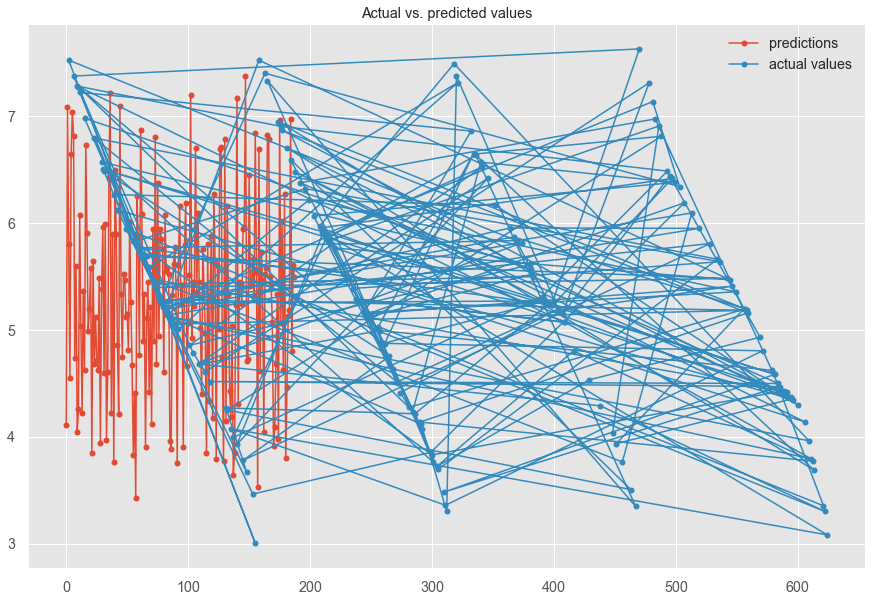

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.style.use('ggplot')
plt.plot(y_hat_test, linestyle='-', marker='o', label='predictions')
plt.plot(y_test, linestyle='-', marker='o', label='actual values')
plt.title('Actual vs. predicted values')
plt.legend()
plt.show()

I'll plot the residual to assess homoscedasticity.

In [45]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

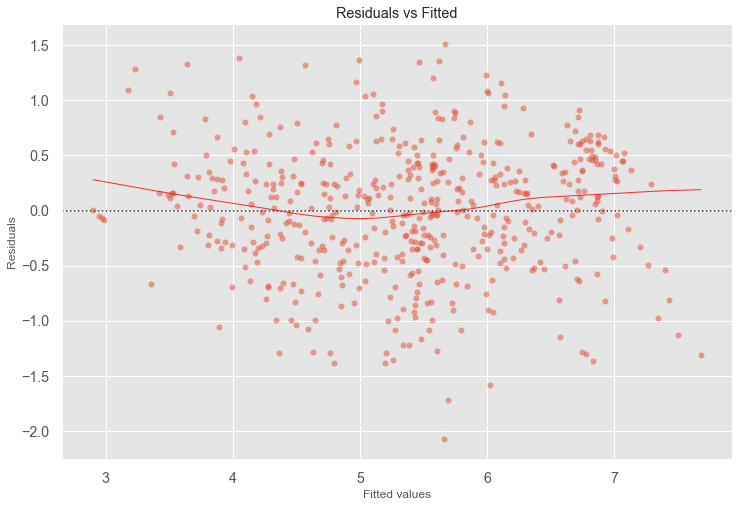

In [49]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Happiness_Score', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

# for i in abs_resid_top_3.index:
#     plot_lm_1.axes[0].annotate(i, 
#                                xy=(model_fitted_y[i], 
#                                    model_residuals[i]));

# Testing Ridge & Lasso application

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

In [ ]:
# Build a Ridge, Lasso and regular linear regression model  
# Note that in scikit-learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_transformed, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_transformed, y_train)

lin = LinearRegression()
lin.fit(X_train_transformed, y_train)

In [ ]:
# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

y_h_lasso_train = np.reshape(lasso.predict(X_train_transformed), (500, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_transformed), (126, 1))

y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)

In [ ]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_transformed))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_transformed))**2))

Our model was not improved by utilizing the Ridge or Lasso methods given that the least error results from the Unpenalized Linear Model.